<h1 align='center'>Домашнее задание Open Data Science</h1>

Задание: 
проанализировать открытый массив данных на свой выбор.
Датасет:
https://www.kaggle.com/datasets/muhammetvarl/laptop-price?select=laptop_price.csv

Цель задания: 
на практике познакомиться с pandas, попробовать поработать с"реальными" данными 
и потренироваться в представлении результатов своих исследований.
Критерии успеха: 
задание опционально, 
критерием успеха является проанализированный (с использованием jypiter notebook, pandas и т.п.) 
каким-угодно образом массив данных, заинтересовавший студента.
Далее успешность определяется review.

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
#Для отражения всех столбцов
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [13]:
#Чтение таблицы
price_df = pd.read_excel('price.xlsx')

In [14]:
#Вывод данных заруженной таблицы
print("\n\nДанные на дату : \n {}".format(price_df))



Данные на дату : 
       laptop_ID    Company                                        Product  \
0             1      Apple                                    MacBook Pro   
1             2      Apple                                    Macbook Air   
2             3         HP                                         250 G6   
3             4      Apple                                    MacBook Pro   
4             5      Apple                                    MacBook Pro   
5             6       Acer                                       Aspire 3   
6             7      Apple                                    MacBook Pro   
7             8      Apple                                    Macbook Air   
8             9       Asus                                ZenBook UX430UN   
9            10       Acer                                        Swift 3   
10           11         HP                                         250 G6   
11           12         HP                             

In [15]:
#Информация по столбцам:
print("\n\nИнформация по столбцам таблицы на дату: \n {}".format(price_df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 122.3+ KB


Информация по столбцам таблицы на дату: 
 None


In [16]:
#Описание данных
print("\n\nСтатистика по таблице на дату : \n {}".format(price_df.describe()))



Статистика по таблице на дату : 
          laptop_ID          Ram       Weight  Price_euros
count  1303.000000  1303.000000  1303.000000  1303.000000
mean    660.155794     8.382195     2.038734  1123.686992
std     381.172104     5.084665     0.665475   699.009043
min       1.000000     2.000000     0.690000   174.000000
25%     331.500000     4.000000     1.500000   599.000000
50%     659.000000     8.000000     2.040000   977.000000
75%     990.500000     8.000000     2.300000  1487.880000
max    1320.000000    64.000000     4.700000  6099.000000


In [17]:
#Выявление дубликатов
Dup_Rows = price_df[price_df.duplicated()]
print("\n\nПовторяющиеся строки : \n {}".format(Dup_Rows))



Повторяющиеся строки : 
 Empty DataFrame
Columns: [laptop_ID, Company, Product, TypeName, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price_euros]
Index: []


In [18]:
#Удаление дубликатов, сохранив только последнее вхождение
DF_RM_DUP = price_df.drop_duplicates(keep='last')
print('\n\nРезультирующий кадр данных после удаления дубликата :\n', DF_RM_DUP.head(n=5))



Результирующий кадр данных после удаления дубликата :
    laptop_ID Company      Product   TypeName  \
0          1   Apple  MacBook Pro  Ultrabook   
1          2   Apple  Macbook Air  Ultrabook   
2          3      HP       250 G6   Notebook   
3          4   Apple  MacBook Pro  Ultrabook   
4          5   Apple  MacBook Pro  Ultrabook   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz    8   
1                            1440x900        Intel Core i5 1.8GHz    8   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz    8   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   16   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34

In [19]:
#Максимальная стоимость товара
print("\n\nМаксимальная стоимость товара на дату: \n {}".format(price_df[price_df['Price_euros'] == price_df['Price_euros'].max()]))



Максимальная стоимость товара на дату: 
      laptop_ID Company    Product TypeName  \
196        200   Razer  Blade Pro   Gaming   

                        ScreenResolution                          Cpu  Ram  \
196  4K Ultra HD / Touchscreen 3840x2160  Intel Core i7 7820HK 2.9GHz   32   

      Memory                      Gpu       OpSys  Weight  Price_euros  
196  1TB SSD  Nvidia GeForce GTX 1080  Windows 10    3.49       6099.0  


In [20]:
#Минимальная стоимость товара
print("\n\nМинимальная стоимость товара на дату: \n {}".format(price_df[price_df['Price_euros'] == price_df['Price_euros'].min()]))



Минимальная стоимость товара на дату: 
       laptop_ID Company                           Product TypeName  \
1215       1233    Acer  C740-C9QX (3205U/2GB/32GB/Chrome  Netbook   

     ScreenResolution                                   Cpu  Ram    Memory  \
1215         1366x768  Intel Celeron Dual Core 3205U 1.5GHz    2  32GB SSD   

                    Gpu      OpSys  Weight  Price_euros  
1215  Intel HD Graphics  Chrome OS     1.3        174.0  


In [21]:
#Малый вес, максимальные RAM и memory
print("\n\nВыборка по весу и памяти на дату: \n {}".format(
    price_df[price_df['Weight'] == price_df['Weight'].min()],
    price_df[price_df['Ram'] == price_df['Ram'].max()],
    price_df[price_df['Memory'] == price_df['Memory'].max()],
))



Выборка по весу и памяти на дату: 
       laptop_ID Company    Product            TypeName  \
50           51  Lenovo  Yoga Book  2 in 1 Convertible   
1082       1097  Lenovo  Yoga Book  2 in 1 Convertible   
1114       1129  Lenovo  Yoga Book  2 in 1 Convertible   
1126       1141  Lenovo  Yoga Book  2 in 1 Convertible   

                     ScreenResolution                          Cpu  Ram  \
50    IPS Panel Touchscreen 1920x1200  Intel Atom x5-Z8550 1.44GHz    4   
1082  IPS Panel Touchscreen 1920x1200  Intel Atom x5-Z8550 1.44GHz    4   
1114  IPS Panel Touchscreen 1920x1200  Intel Atom x5-Z8550 1.44GHz    4   
1126  IPS Panel Touchscreen 1920x1200  Intel Atom x5-Z8550 1.44GHz    4   

                  Memory                    Gpu       OpSys  Weight  \
50    64GB Flash Storage  Intel HD Graphics 400     Android    0.69   
1082  64GB Flash Storage  Intel HD Graphics 400  Windows 10    0.69   
1114  64GB Flash Storage  Intel HD Graphics 400     Android    0.69   
1126  64GB 

In [22]:
#Сводная таблица портативной техники
price_df1 = pd.pivot_table(price_df, index=['Company', 'Product'], values=['Price_euros', 'Weight', 'Ram'])
print("\n\nСводная портативной техники на дату  : \n {}".format(price_df1))



Сводная портативной техники на дату  : 
                                                          Price_euros  \
Company   Product                                                      
Acer      A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce        709.000000   
          Aspire 1                                        329.000000   
          Aspire 3                                        400.959167   
          Aspire 5                                        635.284286   
          Aspire 7                                        825.500000   
          Aspire A315-31                                  323.000000   
          Aspire A315-51                                  428.666667   
          Aspire A515-51G                                 726.750000   
          Aspire A515-51G-32MX                            530.000000   
          Aspire A515-51G-37JS                            572.000000   
          Aspire A515-51G-59QF                            613.000000   
          Aspire A517

In [23]:
#Сводная таблица портативной техники OpSys
price_df2 = pd.pivot_table(price_df, index=['Company', 'Product', 'OpSys'], values=['Price_euros'])
print("\n\nСводная портативной техники OpSys на дату  : \n {}".format(price_df2))



Сводная портативной техники OpSys на дату  : 
                                                                       Price_euros
Company   Product                                       OpSys                    
Acer      A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce      Linux          709.000000
          Aspire 1                                      Windows 10     329.000000
          Aspire 3                                      Linux          350.333333
                                                        Windows 10     417.834444
          Aspire 5                                      Windows 10     635.284286
          Aspire 7                                      Linux          825.500000
          Aspire A315-31                                Linux          298.000000
                                                        Windows 10     348.000000
          Aspire A315-51                                Linux          390.000000
                                                 

In [25]:
price_df3 = price_df.loc[((price_df['Company'] == 'HP') & (price_df['TypeName'] == 'Notebook'))]
price_df4 = pd.pivot_table(price_df3, index=['Product'], columns=['TypeName'], values=['Price_euros'])
print("\n\nСводная HP Notebook на дату : \n {}".format(price_df4))



Сводная HP Notebook на дату : 
                                                Price_euros
TypeName                                          Notebook
Product                                                   
14-am079na (N3710/8GB/2TB/W10)                  389.000000
15-AC110nv (i7-6500U/6GB/1TB/Radeon             764.000000
15-AY023na (N3710/8GB/2TB/W10)                  389.000000
15-BA015wm (E2-7110/4GB/500GB/W10)              297.000000
15-BS026nv (i5-7200U/8GB/256GB/Radeon           618.990000
15-BS028nv (i3-6006U/4GB/1TB/Radeon             469.000000
15-BS078nr (i7-7500U/8GB/1TB/W10)               598.000000
15-BS103nv (i5-8250U/6GB/256GB/Radeon           619.000000
15-BW037na (A9-9420/4GB/1TB/Radeon              489.000000
15-BW091ND (A9-9420/6GB/1TB                     650.000000
15-BW094nd (A6-9220/8GB/128GB/W10)              445.900000
15-ay047nv (i3-6006U/6GB/1TB/Radeon             539.000000
15-ba043na (A12-9700P/8GB/2TB/W10)              629.000000
15-bs002nv (i3-6006U/4

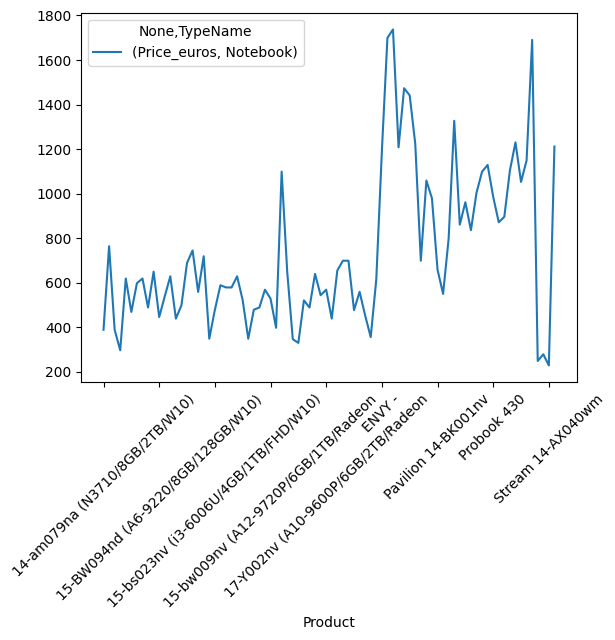

In [26]:
#Линейный график по умолчанию
price_df4.plot()
plt.xticks(rotation=45)
plt.show()

In [29]:
#Сбор данных в новый файл
price_sheets = {'Price': price_df1}
writer1 = pd.ExcelWriter(r'C:\Users\selivanova\Desktop\HM Python\HW09\Price1.xlsx', engine='xlsxwriter')
for sheet_name in price_sheets.keys():
    price_sheets[sheet_name].to_excel(writer1, sheet_name=sheet_name, index=True)

writer1.save()

C:\Users\selivanova\AppData\Local\Temp\ipykernel_13344\494647590.py:7: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer1.save()
